In [5]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [6]:
tickers = ["PG", "^GSPC"]
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source = "yahoo", start = "2012-1-1", end = "2016-12-31")["Adj Close"]

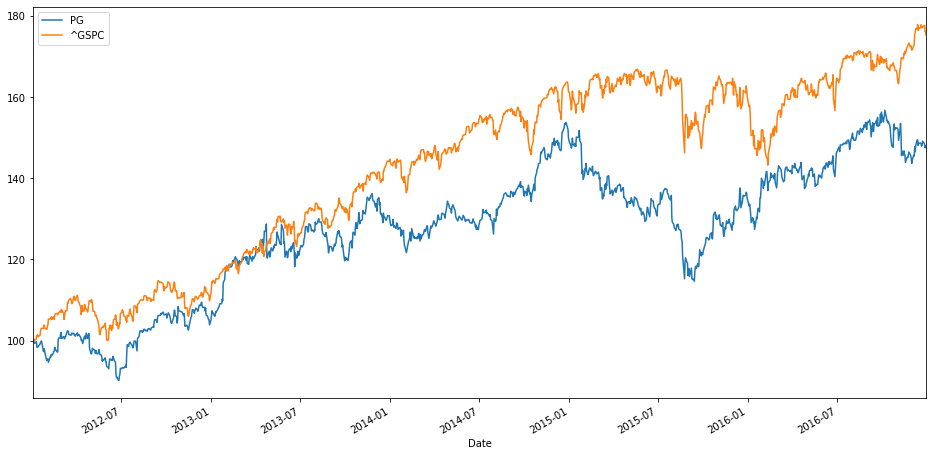

In [7]:
#normalization 
(data/data.iloc[0]*100).plot(figsize = (16,8))

In [8]:
returns = (data/data.shift(1)) - 1 

In [9]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 2 columns):
PG       1257 non-null float64
^GSPC    1257 non-null float64
dtypes: float64(2)
memory usage: 29.5 KB


In [10]:
returns.tail()

,PG,^GSPC
Date,,
2016-12-23,0.005801,0.001252
2016-12-27,-0.004237,0.002248
2016-12-28,-0.006265,-0.008357
2016-12-29,0.003330,-0.000293
2016-12-30,-0.003201,-0.004637


In [11]:
#calculate the covariance for the year for the portfilio 
covv = returns.cov() * 250

In [12]:
covv

,PG,^GSPC
PG,0.020391,0.010072
^GSPC,0.010072,0.016340


In [17]:
cov_withMarket = covv.iloc[0,1]
cov_withMarket

0.010072020704296315

In [13]:
market_var = returns["^GSPC"].var() * 250

In [14]:
market_var

0.016339900880162326

In [15]:
market_vol = np.sqrt(market_var)

In [16]:
market_vol

0.12782762174179071

In [18]:
PG_Beta = cov_withMarket/ market_var
PG_Beta

0.6164064750554507

The beta here tlls us that the PG stock is a defensive stock. If the market does poorly you will lose less. If the market does well you will not make a huge return